# 1. Introduction 

## 1.1 Business Undersranding

## 1.2 Data Understanding

## 1.3 Questions to answer

# 2. Data Wrangling

## 2.1 Loading Libraries and Dataset

In [100]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from sklearn.model_selection import train_test_split

In [2]:
# importing data
house_df = pd.read_csv("Data/kc_house_data.csv")

In [3]:
# previewing the data

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.shape

(21597, 21)

The dataset has 21,597 rows and 21 columns.

In [5]:
# expanding the number of visible columns

pd.set_option('display.max_columns', 21)

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data columns have float, integer and object datatypes. There are some columns such as "waterfront", "view" and "yr_renovated" that have some missing values.

## 2.2 Data Cleaning

The data cleaning methods to be employed are :
- Validity
- Accuracy
- Completeness
- Consistency
- Uniformity

### 2.2.1 Completeness

This method checks for null values, and fixes them.

In [7]:
# checking for columns with null values

house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# percentage of missing values

(house_df.isna().sum()/len(house_df))*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The column "yr_renovated" has the highest number of missing values with 17.8 % of missing values, followed by "waterfront" that has 11% and finally "view" with 0.29%.

#### 2.2.1.1 Year of Renovation Column

In [9]:
# checking the indices with null values 

house_df[house_df["yr_renovated"].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,3,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,3,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,0.0,2.0,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,0.0,0.0,3,8,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,3,10,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


In [10]:
# checking the unique values from the column

house_df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

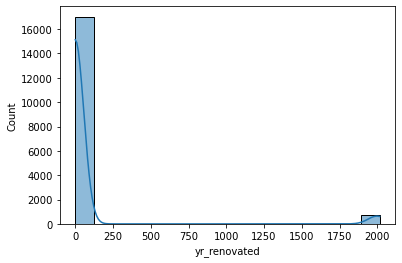

In [11]:
sns.histplot(data = house_df['yr_renovated'], kde = True)

The column has some values with 0, indicating that the particular house was not renovated. The rows with years show the year that they were renovated. The missing values cannot be explained by any other column. The missing values can be imputed with the mode of the data, since year of renovation is a categorical variable and the distribution od the data is skewed.

In [12]:
# calculating the mode of the data

year_renov_mode = house_df['yr_renovated'].mode()[0]

In [13]:
# imputing the missing values with the mode

house_df['yr_renovated'].fillna(value = year_renov_mode, inplace = True)

For the analysis, we'll be checking if a house has been renovated or not. to check if renovating the house has an influence on the price. The year of renovation can be condensed into whether a house has been renovated or not. The rows with year values can be assigned 'Yes' and those with zero values 'No'.

In [14]:
# creating a new column with data on house renovations

house_df['renovated'] = np.where(house_df['yr_renovated'] == 0, 'No', 'Yes')

In [15]:
# previewing the data

house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,No


#### 2.2.1.2 Waterfront Column

In [16]:
# checking the number of null values in waterfront column

house_df['waterfront'].isna().sum()

2376

In [17]:
house_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

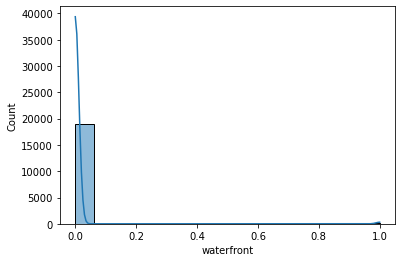

In [18]:
sns.histplot(house_df['waterfront'], kde = True);

Most of the properties have a value of zero, which means they have no waterfront. From the histogram above, it is clear the data is skewed, hence, median or mode can be used for imputation. In this case, mode will be used since warerfront is a categorical variable.

In [19]:
# calculating the mode of the data

waterFront_mode = house_df['waterfront'].mode()[0]
waterFront_mode

0.0

In [20]:
# filling the null values with zero

house_df['waterfront'].fillna(waterFront_mode, inplace = True)

#### 2.2.1.3 View Column

In [21]:
# checking the missing values in view column

house_df['view'].isna().sum()

63

The data has 63 missing values

In [22]:
# checking the count of the column variables

house_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

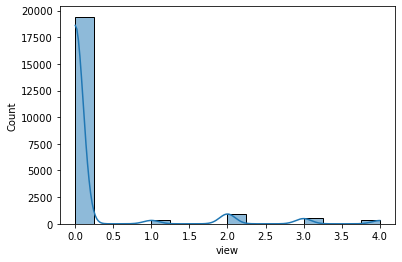

In [23]:
sns.histplot(house_df['view'], kde = True);


The column data ranges from 0 to 4. This column describes how good the view from the property was, with majority of the properties having a view of 0. From the plot, the data is skewed, hence, mode can be used to impute since the column is a categorical variable.

In [24]:
# calculating the mode of tyhe column

view_mode = house_df['view'].mode()[0]
view_mode

0.0

In [25]:
# filling the null values in the column with the mode

house_df['view'].fillna(value = view_mode, inplace = True)

In [26]:
# checking to see if all the missing values have been handled

house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

The data is complete and has no missing values.

### 2.2.2 Uniformity

This describes the extent to which data is specified using the same unit of measure

In [27]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Column 'sqft_basement' has an object data type, yet it is a numeric field. This needs to be converted.

In [28]:
house_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [29]:
house_df[house_df['sqft_basement'] == "?"]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,No
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095,No
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639,No
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750,No
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009,No
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836,No
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,980,?,2008,0.0,98117,47.6844,-122.387,980,1023,No
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396,No


It can be noted that the column has a character '?' in 454 rows. This needs to be removed


In [56]:
house_df['sqft_basement'].replace(to_replace= "?", value = np.nan, inplace = True)

In [66]:
# converting the data type from object to float

house_df['sqft_basement'] = house_df['sqft_basement'].astype('float64')

In [67]:
house_df['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [68]:
house_df['sqft_basement'].isna().sum()

454

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

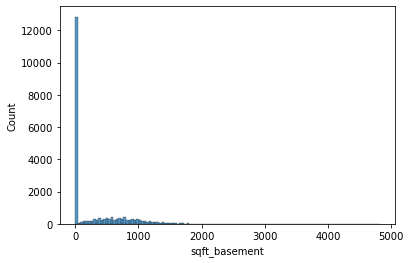

In [69]:
sns.histplot(house_df['sqft_basement'])

It can be noted that most homes have a value of zero for basement size. This means that most homes do not have a basement. From the distribution plot, one can notice that the data is skewed, hence, median can be used to impute the missing values.

In [75]:
basement_median = house_df['sqft_basement'].median()
basement_median

0.0

In [77]:
house_df['sqft_basement'].fillna(value = basement_median, inplace = True)

In [79]:
house_df['sqft_basement'].isna().sum()

0

### 2.2.4 Consistency

This describes the extent to which data is consistent within the same dataset and across multiple datasets.

In [33]:
# checking for duplicates in the data

house_df.duplicated().sum()

0

The data has no duplicates

### 2.2.3 Validity

This checks whether the data conforms to the contstraints applied by the business rules

The columns Id and date are not important in our analysis, so they can be dropped. The column "yr_renovated" is now redundant due to the addition of the 'renovated' column, hence, can aslo be dropped.

In [34]:
# dropping the columns

house_df.drop(["id", "date", "yr_renovated"], axis = 1, inplace = True)

In [35]:
# checking the new shape of the data

house_df.shape

(21597, 19)

The data now has 21,597 rows and 19 columns.

In [80]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  renova

In [81]:
house_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

In [83]:
house_df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [85]:
house_df[house_df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700,No


In [88]:
house_df['bedrooms'].replace(to_replace = 33, value = 3, inplace = True)

In [89]:
house_df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [90]:
house_df[(house_df['bedrooms'] >= 5)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,98107,47.6700,-122.394,1360,4850,No
22,285000.0,5,2.50,2270,6300,2.0,0.0,0.0,3,8,2270,0.0,1995,98092,47.3266,-122.169,2240,7005,No
42,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,0.0,2014,98053,47.6848,-122.016,3625,5639,No
51,345000.0,5,2.50,3150,9134,1.0,0.0,0.0,4,8,1640,1510.0,1966,98056,47.4934,-122.189,1990,9133,No
54,920000.0,5,2.25,2730,6000,1.5,0.0,0.0,3,8,2130,600.0,1927,98105,47.6571,-122.281,2730,6000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21548,579950.0,5,2.75,3080,5752,2.0,0.0,0.0,3,9,3080,0.0,2014,98059,47.4922,-122.153,3000,4650,No
21560,3570000.0,5,4.50,4850,10584,2.0,1.0,4.0,3,10,3540,1310.0,2007,98008,47.5943,-122.110,3470,18270,No
21577,1090000.0,5,3.75,4170,8142,2.0,0.0,2.0,3,10,4170,0.0,2006,98056,47.5354,-122.181,3030,7980,No
21580,679950.0,5,2.75,3600,9437,2.0,0.0,0.0,3,9,3600,0.0,2014,98059,47.4822,-122.131,3550,9421,No


In [91]:
house_df.to_csv('CleanedKingCountyData.csv')

# 3. Exploratory Data Analysis(EDA)

Exploring how the different parameters affect price,hence, will investigate how the different parameters correlate with each other, and with price.

In [36]:
# calculating the correlation

correlation = house_df.corr()

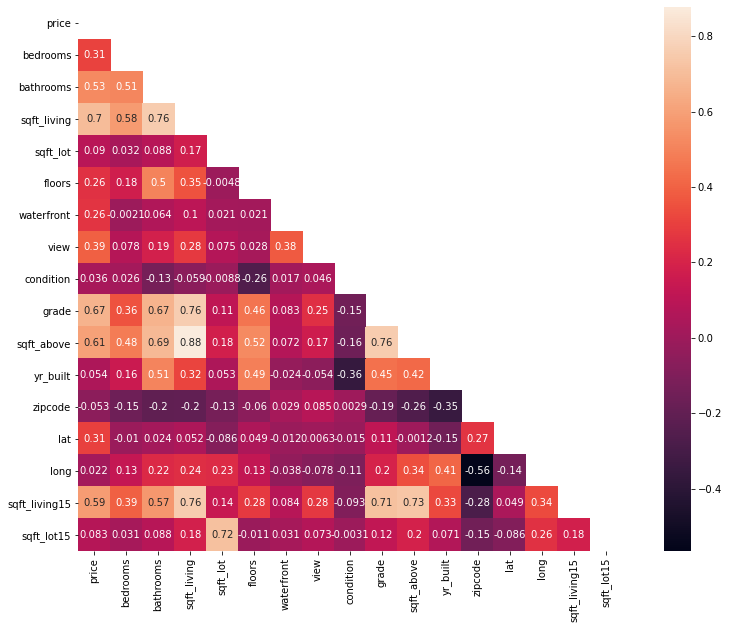

In [37]:
# plotting the correlation

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize= (15,10))

sns.heatmap(
    data = correlation,
    mask = mask,
    square = True,
    annot = True);

It can be noted that 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15' have the highest correlation with price, with 'sqft_living' having the highest correlation.

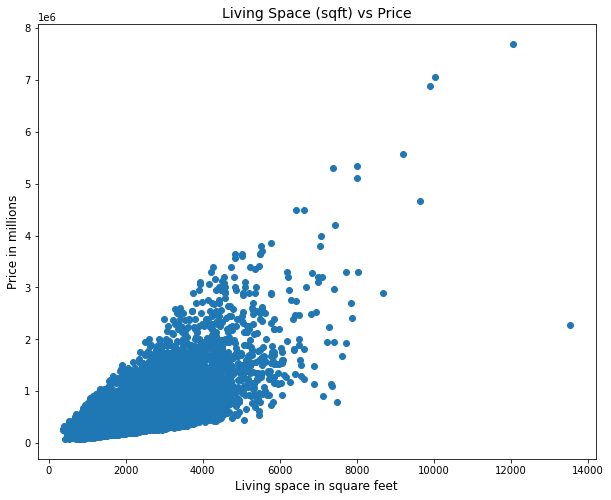

In [38]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(x = house_df['sqft_living'], y = house_df['price'])
font = {'color': 'black', 'size': 12 }

ax.set_title('Living Space (sqft) vs Price', fontdict={'size': 14})
ax.set_xlabel('Living space in square feet',fontdict=font)
ax.set_ylabel('Price in millions', fontdict=font)

plt.savefig('Living Space vs Price.png');

## 3.1 Do home improvements increase the value of a house? By how much?

In [39]:
# aggregating the renovated column by price

renovated_price = house_df.groupby(['renovated'])['price'].mean().reset_index()
renovated_price

,renovated,price
0,No,532140.319858
1,Yes,768901.892473


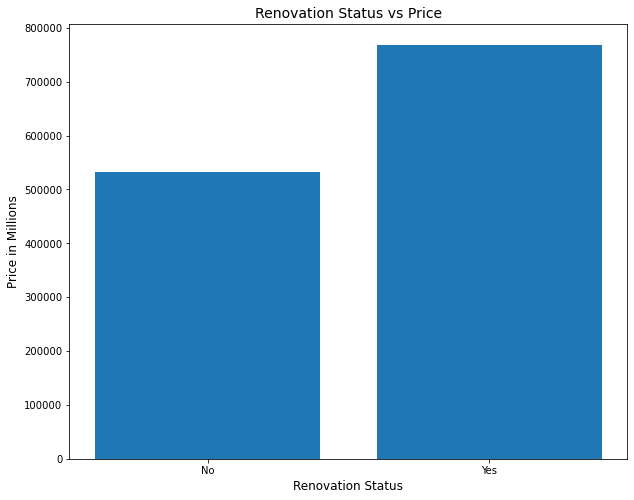

In [40]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))

x = renovated_price["renovated"]
y = renovated_price['price']

ax.bar(x = x, height = y)
font = {'color': 'black', 'size': 12 }

#add_value_label(x = house_df['renovated'], height = house_df['price'])
ax.set_title('Renovation Status vs Price', fontdict={'size': 14})
ax.set_xlabel('Renovation Status',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('Renovation Status vs Price.png');


From the plot above, it can be noted that renovated houses sell at a higher average price than those not renovated. The difference between those renovated and those not renovated is $236,761.57

## 3.2 Does Location affect the house price?

In [41]:
# setting up center latitude and longitude

# latitude = house_df['lat']
# longitude = house_df['long']
# latitude[0]
# initiliazing map with center coordinates

#loc_map = folium.Map([latitude, longitude], zoom_start= 12)

In [42]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No


In [43]:
waterfront_price = house_df.groupby(['waterfront'])['price'].mean().reset_index()
waterfront_price

,waterfront,price
0,0.0,5.322862e+05
1,1.0,1.717215e+06


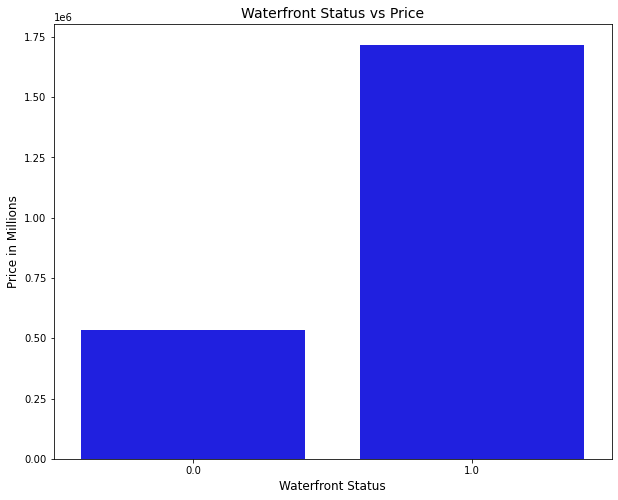

In [44]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))

x = waterfront_price['waterfront']
y = waterfront_price['price']

#ax.bar(x = x, height = y)
sns.barplot(x = x,y = y, color = 'b')
font = {'color': 'black', 'size': 12 }

#add_value_label(x = house_df['renovated'], height = house_df['price'])
ax.set_title('Waterfront Status vs Price', fontdict={'size': 14})
ax.set_xlabel('Waterfront Status',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('Waterfront Status vs Price.png');


From plot, it can be obseved that waterfront properties fetch a higher price than those without a waterfront view. The price of waterfront properties is more than tripple those that are not waterfront properties.

## 3.3 Does condition and grade of a house affect the price?

In [45]:
building_condition = {
    1 : 'Poor to  Worn out',
    2 : 'Fair to Badly worn', 
    3 : 'Average to Some evidence of deferred maintenance and normal obsolescence with age', 
    4 : 'Good to  No obvious maintenance required but neither is everything new', 
    5 : 'Very Good to All items well maintained'
}

In [46]:
building_grade = {
    1 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    2 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    3 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    4 : 'Generally older, low quality construction. Does not meet code',
    5 : 'Low construction costs and workmanship. Small, simple design',
    6 : 'Lowest grade currently meeting building code. Low quality materials and simple designs',
    7 : 'Average grade of construction and design. Commonly seen in plats and older sub-divisions',
    8 : 'Just above average in construction and design. Usually better materials in both the exterior and interior finish work',
    9 : 'Better architectural design with extra interior and exterior design and quality',
    10 : 'Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage',
    11 : 'Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options',
    12 : 'Custom design and excellent builders. All materials are of the highest quality and all conveniences are present',
    13 : 'Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc'
}

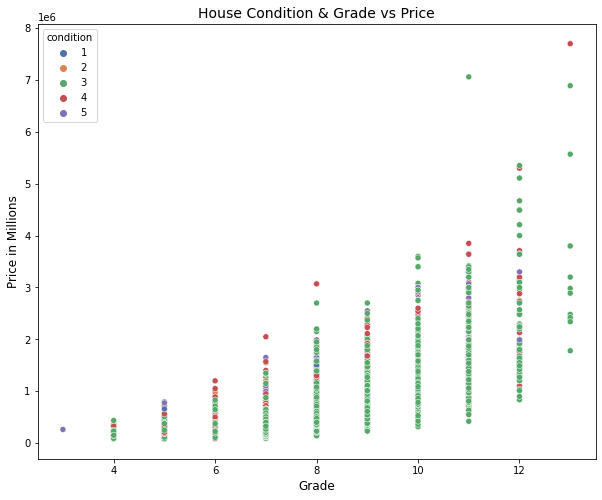

In [47]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))

sns.scatterplot(data = house_df,
               x = 'grade',
               y = 'price',
               hue = 'condition',
               x_bins = 13,
               palette="deep")

font = {'color': 'black', 'size': 12 }

#add_value_label(x = house_df['renovated'], height = house_df['price'])
ax.set_title('House Condition & Grade vs Price', fontdict={'size': 14})
ax.set_xlabel('Grade',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('House Condition & Grade vs Price.png');

In [48]:
house_df.groupby(['condition', 'grade'])['price'].mean().reset_index()

,condition,grade,price
0,1,4,1.500000e+05
1,1,5,2.808333e+05
2,1,6,3.038136e+05
3,1,7,3.344167e+05
4,1,8,9.325000e+05
5,2,4,1.675000e+05
6,2,5,2.061667e+05
7,2,6,2.694839e+05
8,2,7,3.426985e+05
9,2,8,4.219962e+05


In [49]:
condition_df = house_df.groupby(['condition'])['price'].mean().reset_index()

In [50]:
#house_df.groupby(['grade])['price'].mean()

## 3.4 Does the number of bedrooms and bathrooms affect the price of a house?

In [51]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated'],
      dtype='object')

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

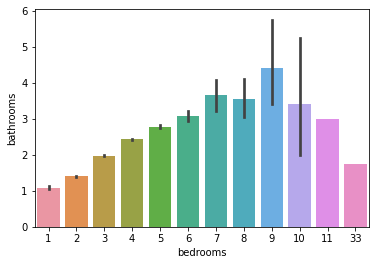

In [52]:
sns.barplot(data = house_df, x = 'bedrooms', y = 'bathrooms')

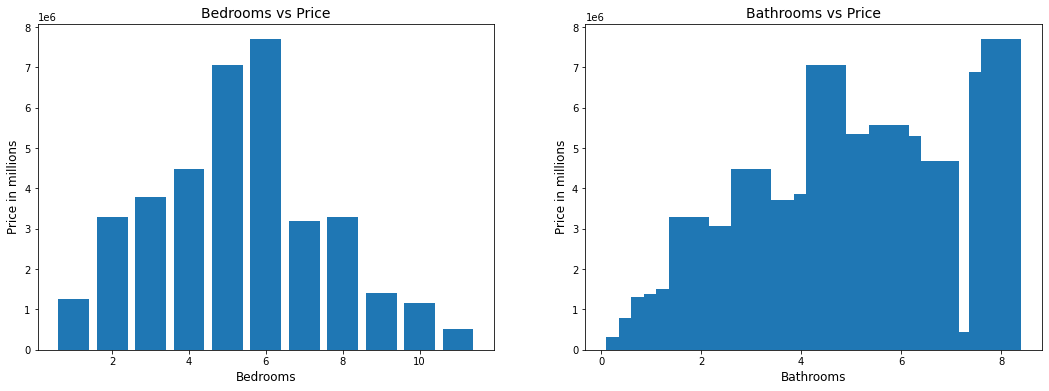

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))

ax1.bar(x = house_df['bedrooms'], height = house_df['price'])
ax2.bar(x = house_df['bathrooms'], height = house_df['price'])
font = {'color': 'black', 'size': 12 }

ax1.set_title('Bedrooms vs Price', fontdict={'size': 14})
ax1.set_xlabel('Bedrooms',fontdict=font)
ax1.set_ylabel('Price in millions', fontdict=font)

ax2.set_title('Bathrooms vs Price', fontdict={'size': 14})
ax2.set_xlabel('Bathrooms',fontdict=font)
ax2.set_ylabel('Price in millions', fontdict=font)

plt.savefig('Bedrooms & Bathrooms vs Price.png');

# 4. Modelling

A good model to predict the price of a house can be used by the real estate company in pricing the houses for sale, or even help clients on buying new homes.

Before modelling, the data needs to be split into training and test data. The training data will be used to train the model, while the test data will be used to test the model to evaluate it's performance. For this model, sklearn will be mainly used, but also statsmodels will be used.

In [96]:
# creating a new dataframe of the data

model_df = house_df.copy()
model_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No


For this model, house price will be the target of the model(y), which is what is to be predicted. The other variables in the data will be the predictors that will be used to predict the model (X).

In [99]:
# splitting the data into predictors and target variables 

X = model_df.drop('price', axis = 1)
y= model_df['price']

The data needs to be split into training and testing data. A 70-30 ratio will be used for the train - test ratio.

In [103]:
# splitting the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 24   # for reproducibility
                                                   )

In [106]:
 # checking the sizes of the new datasets
    
print(len(X_train) == len(y_train))
print(len(X_test) == len(y_test))

True
True


For scikit learn to fit a model, all the inputs have to be numeric. In this case, some preprocessing needs to be done.

## 4.1 Pre-processing

In [110]:
# checking for missing data

model_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

The data has no missing values

Scikit learn models take in only numeric variables, any non- numeric category needs to be converted to numeric features.

In [111]:
# checking if there are aby categorical columns in the data

model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  renova

The 'renovated' column has the data type object, hence, needs to be converted. To determine what method to be used to do the conversion, the number of categories need to be determined.

In [112]:
model_df['renovated'].value_counts()

No     20853
Yes      744
Name: renovated, dtype: int64

The data has 2 categories, hence, can be converted into a single binary column. This can be done using Ordinal Encofer grom scikit learn